In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

import tools

In [2]:
# Select device which you are going to use for training
# device = torch.device("cuda:0")
device = torch.device("cpu")

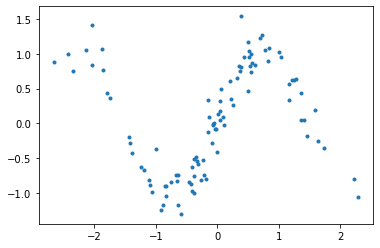

In [3]:
# Let us generate toy data
def get_data():
    np.random.seed(2)
    x = np.random.randn(100, 1)
    x = np.sort(x, axis=0)

    targets = np.sin(x * 2 * np.pi / 3)
    targets = targets + 0.2 * np.random.randn(*targets.shape)

    # Convert to PyTorch tensors
    x = torch.FloatTensor(x)
    targets = torch.FloatTensor(targets)
    
    return x, targets

x, targets = get_data()
# Plot the data
fig, ax = plt.subplots(1)
ax.plot(x, targets, '.')

In [42]:
class MLP(nn.Module):
    
    def __init__(self):
        # YOUR CODE HERE
        super().__init__()
        self.fc1=nn.Linear(1,10)
        self.fc2=nn.Linear(10,11)
        self.fc3=nn.Linear(11,1)
        
        
    def forward(self, x):
        """
        Args:
          x of shape (n_samples, n_inputs): Model inputs.
        
        Returns:
          y of shape (n_samples, 1): Model outputs.
        """
        # YOUR CODE HERE
        out=nn.Tanh(self.fc1(x))
        out=nn.Tanh(self.fc2(out))
        out=self.fc3(out)
        return out
        

In [43]:
# Let us create the network and make sure it can process a random input of the right shape
def test_MLP_shapes():
    n_inputs = 1
    n_samples = 10
    net = MLP()
    y = net(torch.randn(n_samples, n_inputs))
    assert y.shape == torch.Size([n_samples, 1]), f"Bad y.shape={y.shape}"
    print('Success')

test_MLP_shapes()

TypeError: __init__() takes 1 positional argument but 2 were given

In [6]:
# Create the model
model = MLP()
model.to(device)

MLP(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (tanh1): Tanh()
  (fc2): Linear(in_features=10, out_features=11, bias=True)
  (tanh2): Tanh()
  (fc3): Linear(in_features=11, out_features=1, bias=True)
)

In [8]:
# Implement the training loop here

# YOUR CODE HERE
# model.zero_grad()
# output = model(x)
# criterion = nn.MSELoss()
# loss = criterion(output, targets)
# loss.backward()

# optimizer = torch.optim.SGD(model.parameters(), lr=0.01,nesterov=True, momentum=0.9, dampening=0)


In [9]:

# learning_rate = 0.01
# for t in range(200):
#     y_pred = model(x)
#     loss = F.mse_loss(y_pred,targets)
#     model.zero_grad()
#     loss.backward()
#     torch.optim.Adam(model.parameters(), lr=learning_rate)


In [10]:
import torch.optim as optim
optimizer=optim.Adam(model.parameters(),lr=0.001  ) #1e-3


In [29]:
y.shape

torch.Size([100, 1])

In [35]:
for t in range(200):
    for i in range(100):
            # data is a batch of featureset and lables
            # X,y=data
            model.zero_grad() # set gradian to zero
            output=model(x[i])
            loss=F.mse_loss(output,targets[i])
            loss.backward()
            optimizer.step()

In [31]:
# tools.save_model(model, '2_mlp.pth', confirm=False)

Model saved to 2_mlp.pth.


In [32]:
# model = MLP()
# tools.load_model(model, '2_mlp.pth', device)

Model loaded from 2_mlp.pth.


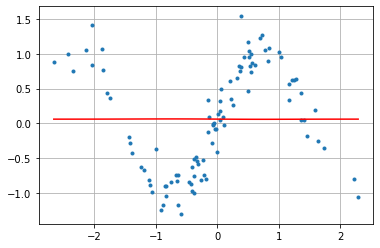

In [36]:
# Plot the trained MLP
with torch.no_grad():
    fig, ax = plt.subplots(1)
    ax.plot(x, targets, '.')
    y = model(x)
    ax.plot(x, y.numpy(), 'r-')
    ax.grid(True)